<a href="https://colab.research.google.com/github/Max-JI64/Kakao_Tech_Bootcamp/blob/main/Daily_class/25_10_24_%EB%94%A5%EB%8B%A4%EC%9D%B4%EB%B8%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 역전파

- 신경망은 역전파 알고리즘에 의해 가중치 학습
- 출력층에서 계산된 Loss의 Gradient를 전달
- 연쇄 법칙 적용

손실함수 : $L$  
$i$번째 층의 가중치 : $W_i$  
i번째 가중치 계산 결과 : $z_i$  
활성화 함수 : $\sigma$  
$z_i$의 활성화 함수 계산 결과 : $a_i$  
$i$번째 층의 가중치에 대한 Loss의 Gradient : $\frac{\partial L}{\partial W_i}$

## 두개의 층 (은닉 - 출력)

1. 입력층 -> 은닉층
- 입력값 $x$에 대한 가중치 계산 : $z_1 = W_1 x + b_1$
- 활성화 함수 계산 : $a_1 = \sigma(z_1)$

2. 은닉층 -> 출력층
- 이전층 $a_1$에 대한 가중치 계산 : $z_2 = W_2 a_1 + b_2$
- 활성화 함수 계산 : $a_2 = \sigma(z_2)$

3. 손실 계산
- MSE의 경우 : $L = (a_2 - y)^2$

4. 출력층 가중치에 대한 역전파 계산
$$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_2}$$  
$$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_2}$$  

5. 은닉층 가중치에 대한 역전파 계산

$$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1}$$  

$$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1}$$  

$$\frac{\partial L}{\partial a_1} = \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot \frac{\partial z_2}{\partial a_1}$$


$$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot \frac{\partial z_2}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1}$$

## $i$번째 층에 대한 역전파

$$\frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial z_i} \cdot \frac{\partial z_i}{\partial W_i}$$  

$$\frac{\partial L}{\partial z_i} = \left( \frac{\partial L}{\partial a_N} \cdot \frac{\partial a_N}{\partial z_N} \cdot \frac{\partial z_N}{\partial a_{N-1}} \cdot \dots \cdot \frac{\partial a_{i+1}}{\partial z_{i+1}} \cdot \frac{\partial z_{i+1}}{\partial a_i} \cdot \frac{\partial a_i}{\partial z_i} \right)$$  


$$\frac{\partial L}{\partial W_i} = \left( \frac{\partial L}{\partial a_N} \cdot \frac{\partial a_N}{\partial z_N} \cdot \frac{\partial z_N}{\partial a_{N-1}} \cdot \dots \cdot \frac{\partial a_{i}}{\partial z_{i}} \right) \cdot \frac{\partial z_{i}}{\partial W_i}$$

## 가중치 학습

- 학습률 : $\eta$
$$W_{\text{new}} = W_{\text{old}} - \eta \frac{\partial L}{\partial W}$$

# 활성화 함수 기울기 소실

k번째 활성화 함수의 Gradient : $\frac{\partial a_k}{\partial z_k} = \sigma'(z_k)$  
$$\frac{\partial L}{\partial W_i} \propto \prod_{k=i}^{N} \sigma'(z_k)$$

## 시그모이드

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#시그마 도함수
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

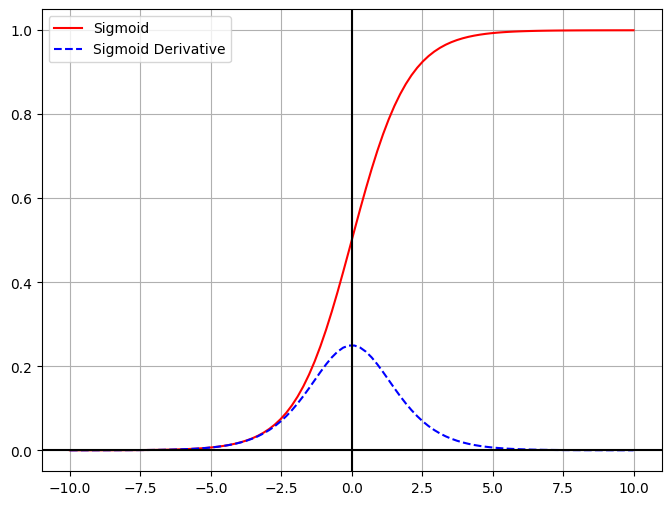

In [ ]:
plt.figure(figsize=(8, 6))
x_vals = np.linspace(-10, 10, 100)

plt.plot(x_vals, sigmoid(x_vals), color='red', label='Sigmoid')
plt.plot(x_vals, sigmoid_derivative(x_vals), color='blue', linestyle='--', label='Sigmoid Derivative')

plt.axvline(color="black")
plt.axhline(color="black")
plt.legend()
plt.grid(True)
plt.show()

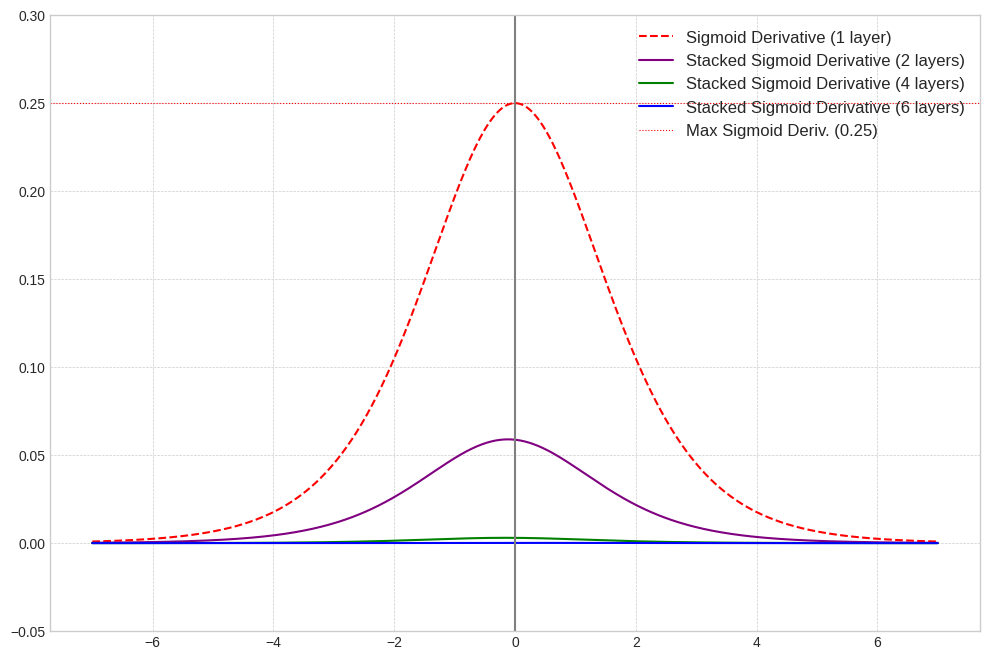

In [ ]:
#시그모이드 도함수 중첩
def stacked_sigmoid(x, num_layers):
    output = x
    for _ in range(num_layers):
        output = sigmoid(output)
    return output

# 중첩된 시그모이드 함수의 도함수 (연쇄 법칙 적용)
def stacked_sigmoid_derivative(x, num_layers):
    derivative_product = 1.0 # 미분값들의 곱을 저장할 변수
    current_input = x

    for _ in range(num_layers):
        # 현재 층의 활성화 함수 미분값을 계산
        current_derivative = sigmoid_derivative(current_input)

        # 이전 층까지의 미분 곱에 현재 층의 미분값을 곱함
        derivative_product *= current_derivative

        # 다음 층의 입력은 현재 층의 활성화 함수 출력
        current_input = sigmoid(current_input)

    return derivative_product

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

x_vals = np.linspace(-7, 7, 500)

# 단일 시그모이드 층
plt.plot(x_vals, sigmoid_derivative(x_vals), color='red', linestyle='--', label='Sigmoid Derivative (1 layer)')

# 여러 층의 시그모이드 중첩 (기울기 소실 효과)
layer_counts = [2, 4, 6] # 층의 개수
colors = ['purple', 'green', 'blue'] # 각 층에 대한 색상

for i, num_layers in enumerate(layer_counts):
    # 중첩된 시그모이드 함수의 미분값 계산
    derivative_at_x = stacked_sigmoid_derivative(x_vals, num_layers)
    plt.plot(x_vals, derivative_at_x, color=colors[i], label=f'Stacked Sigmoid Derivative ({num_layers} layers)')

plt.axvline(x=0, color='grey') # x=0 기준선
# plt.axhline(y=0, color='black', linestyle=":") # y=0 기준선
plt.axhline(y=sigmoid_derivative(0), color='red', linestyle=':', linewidth=0.8, label=f'Max Sigmoid Deriv. ({sigmoid_derivative(0):.2f})') # 최대 기울기 (0.25)
plt.legend(fontsize=12)
plt.ylim(-0.05, 0.3)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## 하이퍼볼릭 탄젠트

In [ ]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def tanh_derivative(x):
    t = tanh(x)
    return 1 - t**2

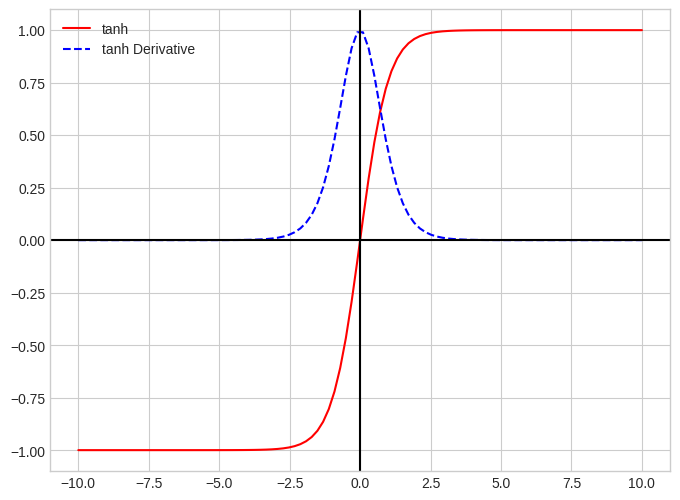

In [ ]:
plt.figure(figsize=(8, 6))
x_vals = np.linspace(-10, 10, 100)

plt.plot(x_vals, tanh(x_vals), color='red', label='tanh')
plt.plot(x_vals, tanh_derivative(x_vals), color='blue', linestyle='--', label='tanh Derivative')

plt.axvline(color="black")
plt.axhline(color="black")
plt.legend()
plt.grid(True)
plt.show()

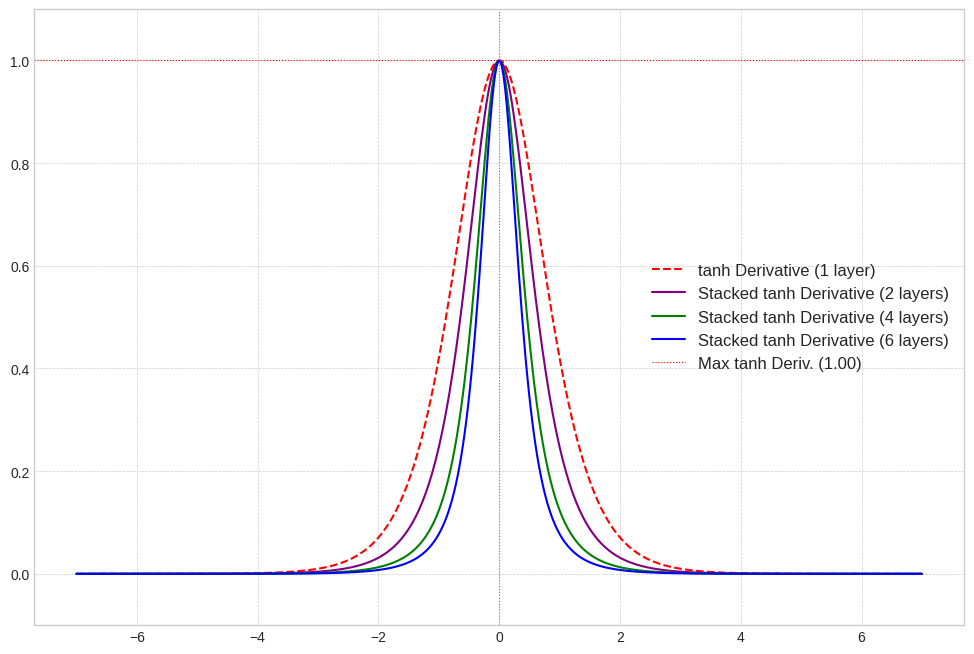

In [ ]:
def stacked_tanh_derivative(x, num_layers):
    derivative_product = 1.0 # 미분값들의 곱을 저장할 변수
    current_input = x

    for _ in range(num_layers):
        # 현재 층의 활성화 함수 미분값을 계산
        current_derivative = tanh_derivative(current_input)

        # 이전 층까지의 미분 곱에 현재 층의 미분값을 곱함
        derivative_product *= current_derivative

        # 다음 층의 입력은 현재 층의 활성화 함수 출력
        current_input = np.tanh(current_input)

    return derivative_product

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

x_vals = np.linspace(-7, 7, 500)

# 단일 tanh 층
plt.plot(x_vals, tanh_derivative(x_vals), color='red', linestyle='--', label='tanh Derivative (1 layer)')

# 여러 층의 tanh 중첩 (기울기 소실 효과)
layer_counts = [2, 4, 6] # 층의 개수
colors = ['purple', 'green', 'blue'] # 각 층에 대한 색상

for i, num_layers in enumerate(layer_counts):
    # 중첩된 tanh 함수의 미분값 계산
    derivative_at_x = stacked_tanh_derivative(x_vals, num_layers)
    plt.plot(x_vals, derivative_at_x, color=colors[i], label=f'Stacked tanh Derivative ({num_layers} layers)')

plt.axvline(x=0, color='grey', linestyle=':', linewidth=0.8) # x=0 기준선
# plt.axhline(y=0, color='black', linewidth=0.8) # y=0 기준선
plt.axhline(y=tanh_derivative(0), color='red', linestyle=':', linewidth=0.8, label=f'Max tanh Deriv. ({tanh_derivative(0):.2f})') # 최대 기울기 (1.00)
plt.legend(fontsize=12)
plt.ylim(-0.1, 1.1) # Y축 범위 조정
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## ReLu

In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

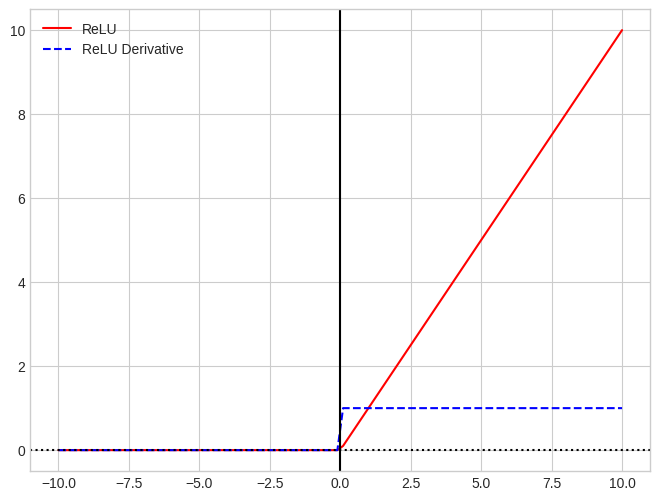

In [ ]:
plt.figure(figsize=(8, 6))
x_vals = np.linspace(-10, 10, 100)

plt.plot(x_vals, relu(x_vals), color='red', label='ReLU')
plt.plot(x_vals, relu_derivative(x_vals), color='blue', linestyle='--', label='ReLU Derivative')

plt.axvline(color="black")
plt.axhline(color="black",linestyle=':')
plt.legend()
plt.grid(True)
plt.show()

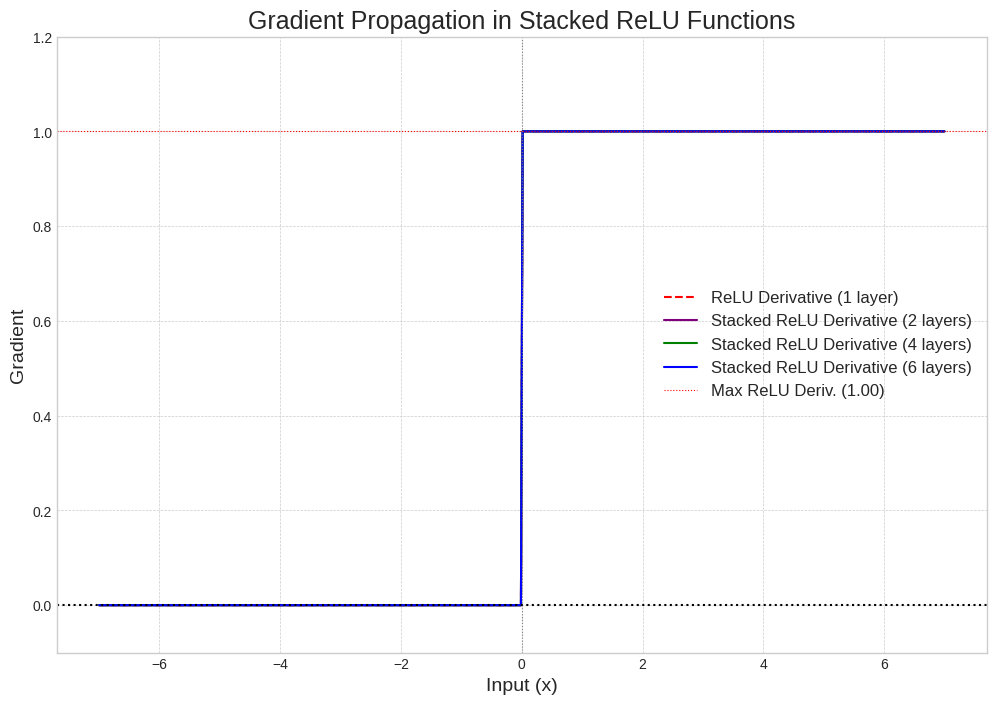

In [ ]:
def stacked_relu_derivative(x, num_layers):
    derivative_product = 1.0 # 미분값들의 곱을 저장할 변수
    current_input = x

    for _ in range(num_layers):
        # 현재 층의 활성화 함수 미분값을 계산
        current_derivative = relu_derivative(current_input)

        # 이전 층까지의 미분 곱에 현재 층의 미분값을 곱함
        derivative_product *= current_derivative

        # 다음 층의 입력은 현재 층의 활성화 함수 출력
        current_input = relu(current_input)

    return derivative_product

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

x_vals = np.linspace(-7, 7, 500)

# 단일 ReLU 층
plt.plot(x_vals, relu_derivative(x_vals), color='red', linestyle='--', label='ReLU Derivative (1 layer)')

# 여러 층의 ReLU 중첩
layer_counts = [2, 4, 6] # 층의 개수
colors = ['purple', 'green', 'blue'] # 각 층에 대한 색상

for i, num_layers in enumerate(layer_counts):
    # 중첩된 ReLU 함수의 미분값 계산
    derivative_at_x = stacked_relu_derivative(x_vals, num_layers)
    plt.plot(x_vals, derivative_at_x, color=colors[i], label=f'Stacked ReLU Derivative ({num_layers} layers)')

plt.axvline(x=0, color='grey', linestyle=':', linewidth=0.8) # x=0 기준선
plt.axhline(y=0, color='black', linestyle=":") # y=0 기준선
plt.axhline(y=1, color='red', linestyle=':', linewidth=0.8, label='Max ReLU Deriv. (1.00)') # 최대 기울기 (1.00)
plt.title('Gradient Propagation in Stacked ReLU Functions', fontsize=18)
plt.xlabel('Input (x)', fontsize=14)
plt.ylabel('Gradient', fontsize=14)
plt.legend(fontsize=12)
plt.ylim(-0.1, 1.2) # Y축 범위 조정
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Leaky ReLu

In [ ]:
def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.1):
    return np.where(x > 0, 1, alpha)

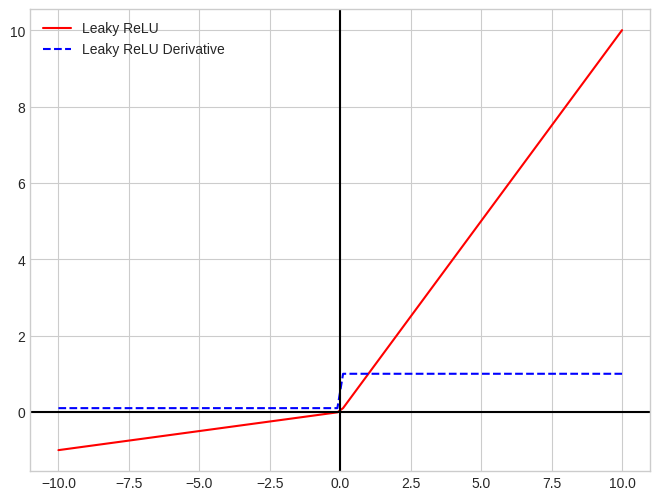

In [ ]:
plt.figure(figsize=(8, 6))
x_vals = np.linspace(-10, 10, 100)

plt.plot(x_vals, leaky_relu(x_vals), color='red', label='Leaky ReLU')
plt.plot(x_vals, leaky_relu_derivative(x_vals), color='blue', linestyle='--', label='Leaky ReLU Derivative')

plt.axvline(color="black")
plt.axhline(color="black")
plt.legend()
plt.grid(True)
plt.show()

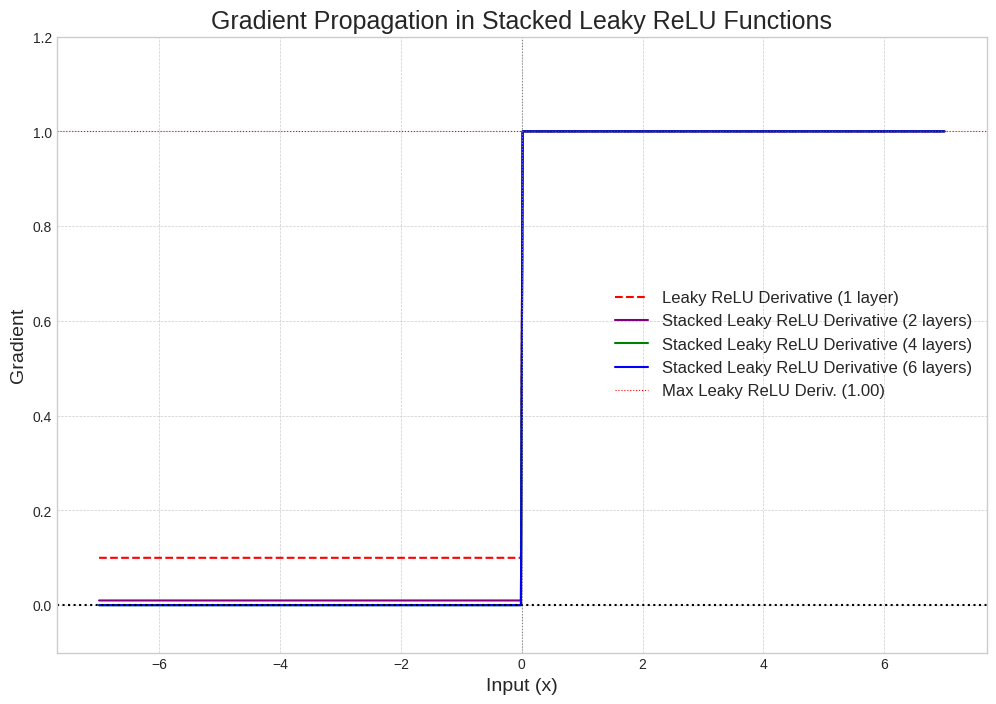

In [ ]:
def stacked_leaky_relu_derivative(x, num_layers, alpha=0.1):
    derivative_product = 1.0 # 미분값들의 곱을 저장할 변수
    current_input = x

    for _ in range(num_layers):
        # 현재 층의 활성화 함수 미분값을 계산
        current_derivative = leaky_relu_derivative(current_input, alpha)

        # 이전 층까지의 미분 곱에 현재 층의 미분값을 곱함
        derivative_product *= current_derivative

        # 다음 층의 입력은 현재 층의 활성화 함수 출력
        current_input = leaky_relu(current_input, alpha)

    return derivative_product

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

x_vals = np.linspace(-7, 7, 500)

# 단일 Leaky ReLU 층
plt.plot(x_vals, leaky_relu_derivative(x_vals), color='red', linestyle='--', label='Leaky ReLU Derivative (1 layer)')

# 여러 층의 Leaky ReLU 중첩
layer_counts = [2, 4, 6] # 층의 개수
colors = ['purple', 'green', 'blue'] # 각 층에 대한 색상

for i, num_layers in enumerate(layer_counts):
    # 중첩된 Leaky ReLU 함수의 미분값 계산
    derivative_at_x = stacked_leaky_relu_derivative(x_vals, num_layers)
    plt.plot(x_vals, derivative_at_x, color=colors[i], label=f'Stacked Leaky ReLU Derivative ({num_layers} layers)')

plt.axvline(x=0, color='grey', linestyle=':', linewidth=0.8) # x=0 기준선
plt.axhline(y=0, color='black', linestyle=':') # y=0 기준선
plt.axhline(y=1, color='red', linestyle=':', linewidth=0.8, label='Max Leaky ReLU Deriv. (1.00)') # 최대 기울기 (1.00)
plt.title('Gradient Propagation in Stacked Leaky ReLU Functions', fontsize=18)
plt.xlabel('Input (x)', fontsize=14)
plt.ylabel('Gradient', fontsize=14)
plt.legend(fontsize=12)
plt.ylim(-0.1, 1.2) # Y축 범위 조정
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## GELU

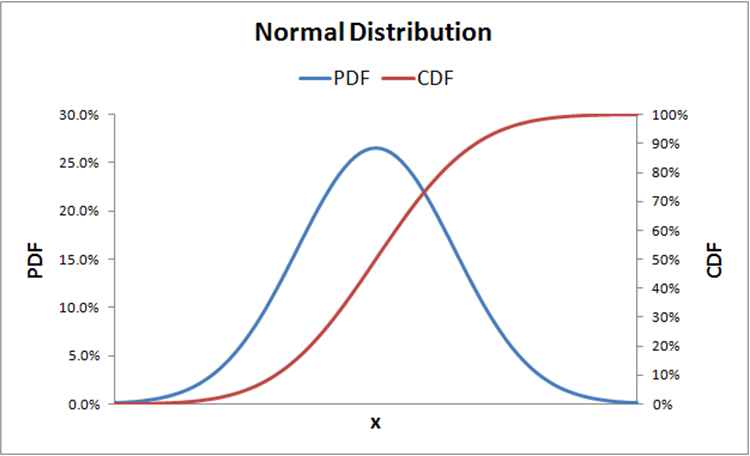

In [ ]:
def gelu(x):
    return x * norm.cdf(x) # 표준정규분포의 누적분포함수(CDF)

def gelu_derivative(x):
    return norm.cdf(x) + x * norm.pdf(x)

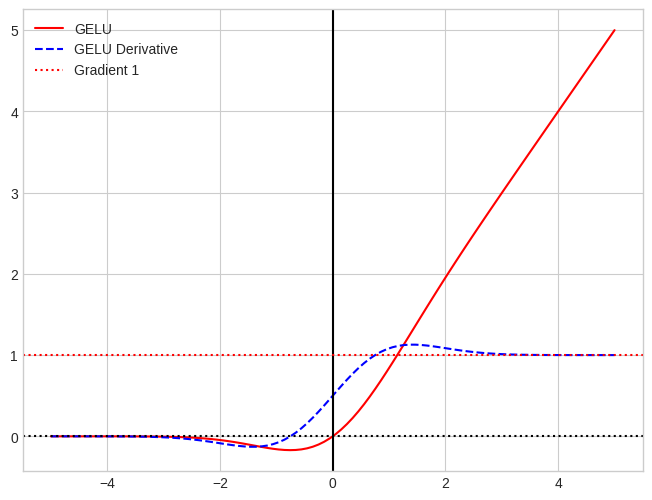

In [ ]:
plt.figure(figsize=(8, 6))
x_vals = np.linspace(-5, 5, 100)

plt.plot(x_vals, gelu(x_vals), color='red', label='GELU')
plt.plot(x_vals, gelu_derivative(x_vals), color='blue', linestyle='--', label='GELU Derivative')

plt.axvline(color="black")
plt.axhline(color="black", linestyle=":")
plt.axhline(y=1, color="red", linestyle=":", label="Gradient 1")
plt.legend()
plt.grid(True)
plt.show()

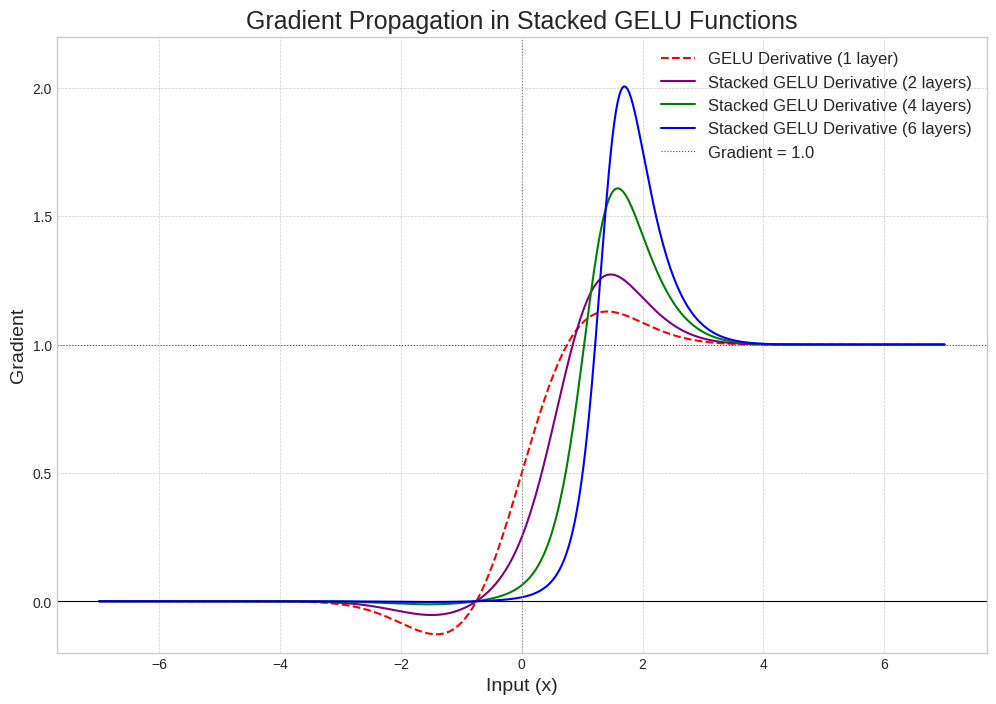

In [ ]:
def stacked_gelu_derivative(x, num_layers):
    derivative_product = 1.0 # 미분값들의 곱을 저장할 변수
    current_input = x

    for _ in range(num_layers):
        # 현재 층의 활성화 함수 미분값을 계산
        current_derivative = gelu_derivative(current_input)

        # 이전 층까지의 미분 곱에 현재 층의 미분값을 곱함
        derivative_product *= current_derivative

        # 다음 층의 입력은 현재 층의 활성화 함수 출력
        current_input = gelu(current_input)

    return derivative_product

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

x_vals = np.linspace(-7, 7, 500)

# 단일 GELU 층
plt.plot(x_vals, gelu_derivative(x_vals), color='red', linestyle='--', label='GELU Derivative (1 layer)')

# 여러 층의 GELU 중첩
layer_counts = [2, 4, 6] # 층의 개수
colors = ['purple', 'green', 'blue'] # 각 층에 대한 색상

for i, num_layers in enumerate(layer_counts):
    # 중첩된 GELU 함수의 미분값 계산
    derivative_at_x = stacked_gelu_derivative(x_vals, num_layers)
    plt.plot(x_vals, derivative_at_x, color=colors[i], label=f'Stacked GELU Derivative ({num_layers} layers)')

plt.axvline(x=0, color='grey', linestyle=':', linewidth=0.8) # x=0 기준선
plt.axhline(y=0, color='black', linewidth=0.8) # y=0 기준선
plt.axhline(y=1, color='red', linestyle=':', linewidth=0.8, label='Gradient = 1.0')
plt.title('Gradient Propagation in Stacked GELU Functions', fontsize=18)
plt.xlabel('Input (x)', fontsize=14)
plt.ylabel('Gradient', fontsize=14)
plt.legend(fontsize=12)
plt.ylim(-0.2, 2.2) # Y축 범위 조정
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()